# Client Profile Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
file_path = r'C:\Users\ALEV PC\Desktop\Project\Data\Raw data\df_final_demo.txt'
df = pd.read_csv(file_path)
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df.dropna(inplace=True)
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
df.rename(columns={'gendr': 'gender'}, inplace=True)
print("Unique values in 'gender' column:", df['gender'].unique())

Unique values in 'gender' column: ['U' 'M' 'F' 'X']


In [9]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64


# Exploring the data - Age groups, Tenure, Correlations

Basic statistics of client tenure:
count    70594.000000
mean        12.053007
std          6.871850
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64


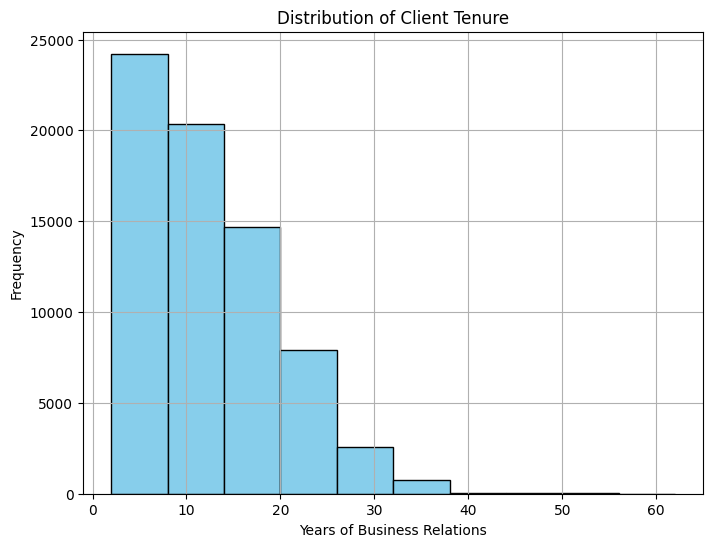

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

tenure_stats = df['clnt_tenure_yr'].describe()

print("Basic statistics of client tenure:")
print(tenure_stats)

# Visualize the distribution of client tenure
plt.figure(figsize=(8, 6))
plt.hist(df['clnt_tenure_yr'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Tenure')
plt.xlabel('Years of Business Relations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

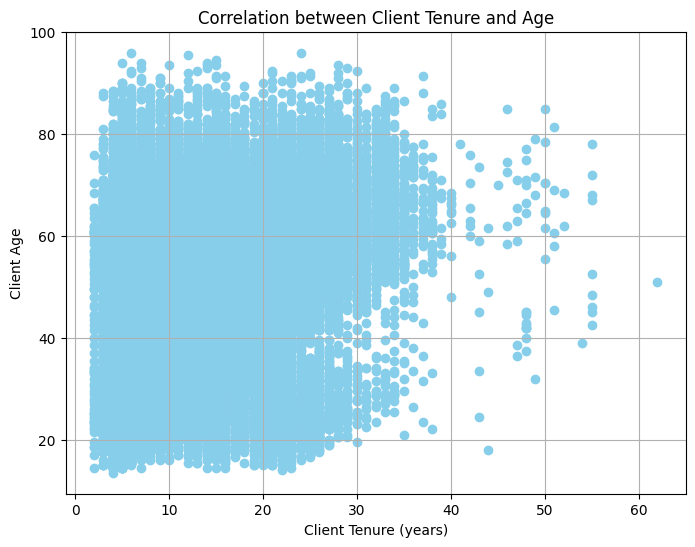

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['clnt_tenure_yr'], df['clnt_age'], color='skyblue')
plt.title('Correlation between Client Tenure and Age')
plt.xlabel('Client Tenure (years)')
plt.ylabel('Client Age')
plt.grid(True)
plt.show()

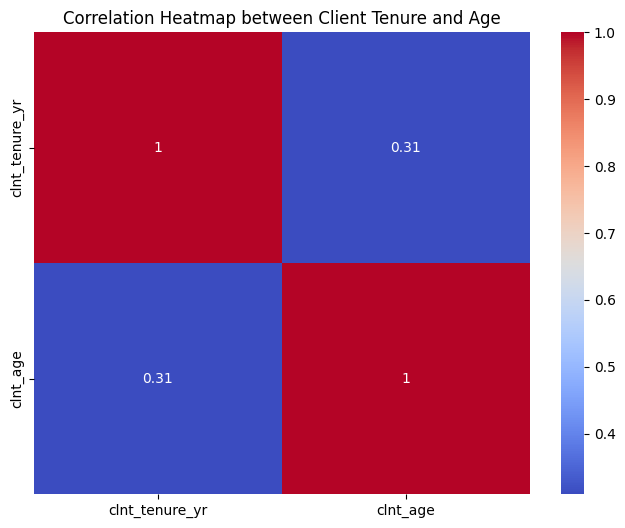

In [17]:
# Correlation matrix to create an heat map to read the correlation better: 

correlation_matrix = df[['clnt_tenure_yr', 'clnt_age']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Client Tenure and Age')
plt.show()

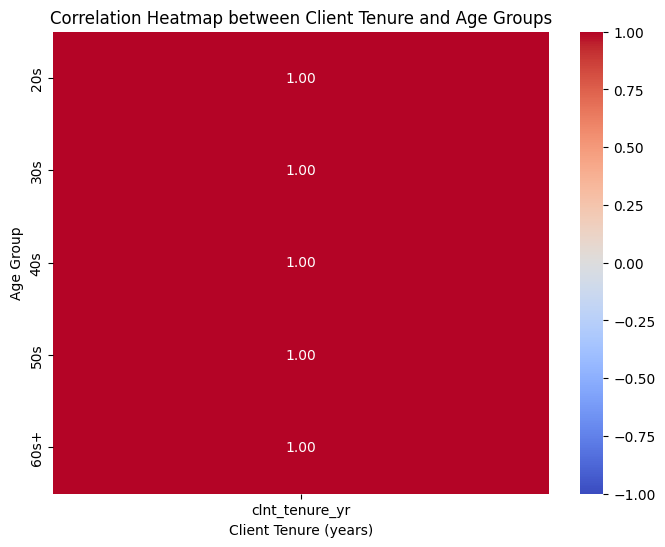

In [19]:
def age_group(age):
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# Apply age group function to create a new column
df['age_group'] = df['clnt_age'].apply(age_group)

# Correlation matrix
correlation_matrix = df[['clnt_tenure_yr', 'age_group']].groupby('age_group').corr().unstack()['clnt_tenure_yr']

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Client Tenure and Age Groups')
plt.xlabel('Client Tenure (years)')
plt.ylabel('Age Group')
plt.show()

In [ ]:
# 1 indicates there is a positive correlation between number of years of business relations and customer's age. As they get older, number of years
# of their tenure with the business increases. 

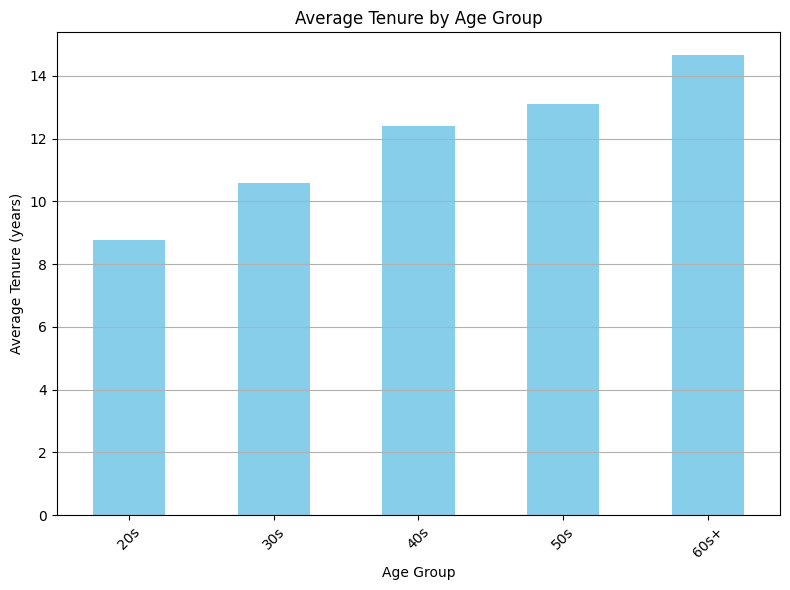

In [20]:
def age_group(age):
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# Apply age group function to create a new column
df['age_group'] = df['clnt_age'].apply(age_group)

# Calculate average tenure for each age group
avg_tenure_by_age_group = df.groupby('age_group')['clnt_tenure_yr'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
avg_tenure_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Tenure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Tenure (years)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()